## Observations and Insights 

In [1]:
#%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
data=mouse_metadata.merge(study_results, how='outer',on='Mouse ID')
data.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_of_mouse=len(data['Mouse ID'].unique())
print(number_of_mouse)


249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#dropping duplicates that repeat Mouse ID and Timepoint
datac=data.drop_duplicates(subset=['Mouse ID','Timepoint'])

number_of_mouse=len(datac['Mouse ID'].unique())

print(number_of_mouse)
datac.head()

249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Optional: Get all the data for the duplicate mouse
 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [7]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume=datac['Tumor Volume (mm3)']
mean_tumor=np.mean(tumor_volume)
median_tumor=np.median(tumor_volume)
#ddof=0 max likelihood variance 
variance_tumor=np.var(tumor_volume,ddof=0)
st_tumor=np.std(tumor_volume)
sem_tumor=st.sem(tumor_volume)
print(sem_tumor)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
by_reg=datac.groupby("Drug Regimen")["Tumor Volume (mm3)"]


# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_regimen=by_reg.mean().to_frame()
median_regimen=by_reg.median().to_frame()
var_regimen=by_reg.var().to_frame()
std_regimen=by_reg.std().to_frame()
sem_regimen=by_reg.sem().to_frame()
#list_summary=["mean_regimen","median_regimen","var_regimen","std_regimen","sem_regimen"]
#print(mean_regimen)
#print(median_regimen)
#print(var_regimen)
#print(std_regimen)
#print(sem_regimen)
regimen_list=datac['Drug Regimen'].unique()

# Assemble the resulting series into a single summary dataframe.
summary_df=mean_regimen.merge(median_regimen, how="outer", on="Drug Regimen")
summary_df1=var_regimen.merge(std_regimen, how="outer", on="Drug Regimen")
summary_df=summary_df.merge(summary_df1,how="outer",on="Drug Regimen")
summary_df=summary_df.merge(sem_regimen,how="outer", on="Drug Regimen")

summary_df.columns=["mean_regimen","median_regimen","var_regimen","std_regimen","sem_regimen"]
summary_df.head()



0.2049329125626728


,mean_regimen,median_regimen,var_regimen,std_regimen,sem_regimen
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<AxesSubplot:xlabel='drug_regimen'>

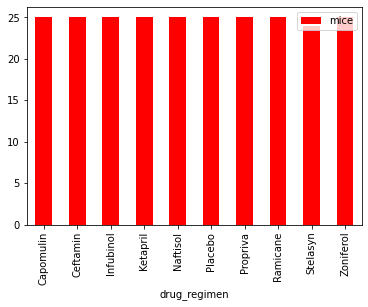

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_reg_unique=datac.drop_duplicates(subset=['Mouse ID','Drug Regimen'])
mice_reg=mice_reg_unique.groupby("Drug Regimen").count()["Mouse ID"]

#mice_reg.columns=["drug_regimen","mice"]

mice_reg=mice_reg.to_frame()
mice_reg.columns=["mice"]
mice_reg.index.names=["drug_regimen"]
mice_reg.plot(kind="bar", facecolor="red")


Text(0, 0.5, 'Number of Mice')

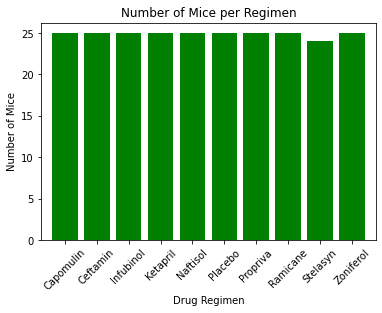

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
reg_list=mice_reg.index.to_list()
x_axis = np.arange(len(reg_list))
mice=mice_reg["mice"]
plt.bar(x_axis, mice, color="g", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,reg_list,rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.title("Number of Mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

Text(0, 0.5, 'Number of Mice')

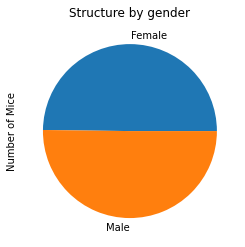

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender=mice_reg_unique.groupby("Sex").count()["Mouse ID"]
mice_gender_pie = mice_gender.plot(kind="pie", y='Sex', title=("Structure by gender"))
mice_gender_pie.set_ylabel("Number of Mice")


([<matplotlib.patches.Wedge at 0x2a9aa9ed2b0>,
 [Text(0.006939175976765795, 1.0999781124353174, 'Female'),
  Text(-0.006939175976765929, -1.0999781124353174, 'Male')])

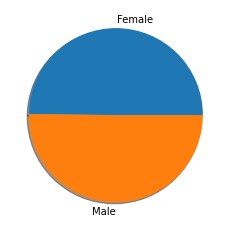

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_list=mice_gender.index.to_list()
#mice_gender.to_frame()
mice_genderf=mice_gender.reset_index()
gender=mice_genderf['Sex']
number_mice=mice_genderf['Mouse ID']
explode=(0,0)
plt.pie(number_mice, explode=explode, labels=gender, shadow=True)


In [14]:
#datac.rename({'Mouse ID':'mouse','Drug Regimen':'regimen','Sex': 'gender','Age_months':'age','Weight (g)':'weight',
              #'Timepoint': 'time','Tumor Volumne (mm3)':'tumor','Metastatic Sites': 'metast'})
datac.columns=['mouse','regimen','gender','age','weight','time','tumor','metast']


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
list_reg=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

#filter and separate 4 regimen as a new dataframe
data_four=datac.loc[(datac['regimen']=='Capomulin')|(datac['regimen']=='Ramicane')|(datac['regimen']=='Infubinol')|(datac['regimen']=='Ceftamin')]
mice=len(data_four["mouse"].unique())

# Start by getting the last (greatest) timepoint for each mouse

data_four_tumor=data_four.groupby('mouse').max()['time']
data_max=data_four_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
data_all=pd.merge(data_max,data_four, on='mouse')
#drop everything else, and keep the max time
data_all=data_all.loc[(data_all['time_x']==data_all['time_y'])]

print(f"number of unique mice in a new dataset {mice}")
data_all.head()

number of unique mice in a new dataset 100


,mouse,time_x,regimen,gender,age,weight,time_y,tumor,metast
9,a203,45,Infubinol,Female,20,23,45,67.973419,2
19,a251,45,Infubinol,Female,21,25,45,65.525743,1
29,a275,45,Ceftamin,Female,20,28,45,62.999356,3
39,a411,45,Ramicane,Male,3,22,45,38.407618,1
49,a444,45,Ramicane,Female,10,25,45,43.047543,0


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
###already done name is list_reg

# Create empty list to fill with tumor vol data (for plotting)
tumor=["tumor_cap","tumor_ram","tumor_infu","tumor_ceft"]

tumor_cap=data_all["tumor"].loc[(data_all["regimen"]=="Capomulin")]
tumor_ram=data_all["tumor"].loc[(data_all["regimen"]=="Ramicane")]
tumor_infu=data_all["tumor"].loc[(data_all["regimen"]=="Infubinol")]
tumor_ceft=data_all["tumor"].loc[(data_all["regimen"]=="Ceftamin")]


#list of the names of the size of the tumor per regimen

tumor=["tumor_cap","tumor_ram","tumor_infu","tumor_ceft"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles_cap =tumor_cap.quantile([.25,.5,.75])

lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
outlier_cap=data_all.loc[(data_all['regimen']=="Capomulin")&((data_all['tumor']>=upper_bound_cap)|(data_all['tumor']<=(data_all['tumor']<=lower_bound_cap)))]
outlier_cap
#per boxplot only Infubinol has an outlier, so I will find that next

quartiles_infu =tumor_infu.quantile([.25,.5,.75])

lowerq_infu = quartiles_infu[0.25]
upperq_infu = quartiles_infu[0.75]
iqr_infu = upperq_infu-lowerq_infu
print(quartiles_infu)

lower_bound_infu = lowerq_infu - (1.5*iqr_infu)
upper_bound_infu = upperq_infu + (1.5*iqr_infu)
outlier_infu=data_all.loc[(data_all['regimen']=="Infubinol")&((data_all['tumor']>=upper_bound_infu)|(data_all['tumor']<=lower_bound_infu))]
outlier_infu.head()


0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: tumor, dtype: float64


,mouse,time_x,regimen,gender,age,weight,time_y,tumor,metast
132,c326,5,Infubinol,Female,18,25,5,36.321346,0


<AxesSubplot:>

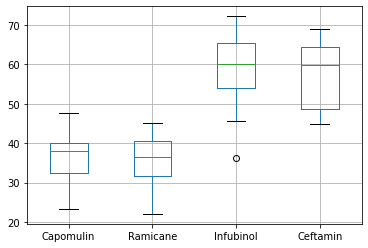

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_dict={'Capomulin':tumor_cap, 'Ramicane':tumor_ram, 'Infubinol':tumor_infu,'Ceftamin':tumor_ceft}
tumor_df=pd.DataFrame(tumor_dict)
tumor_df.boxplot()




## Line and Scatter Plots

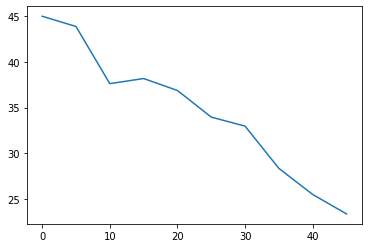

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

data_reg1=datac.loc[(datac["regimen"]=="Capomulin")]
data_reg=data_reg1.groupby("mouse")
data_mouse=data_reg.get_group('s185')
data_volume=data_mouse['tumor']
data_time=data_mouse['time']

plt.plot(data_time,data_volume)
plt.xlabel=("Time")
plt.ylabel=("Size of a tumor")
plt.title=("Change of the tumor size per time")
plt.show()


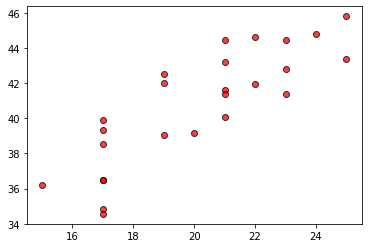

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#find average tumor volume
avg_tumor_df=data_reg["tumor"].mean().reset_index()
data_scatterf=avg_tumor_df.merge(data_reg1, on='mouse')
#data_scatter has tumor_x as the avergae size of the tumor
data_scatter=data_scatterf.drop_duplicates(subset=["mouse",'tumor_x'])

x_axis=data_scatter['weight']
y_axis=data_scatter['tumor_x']
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel=("Weight of a Mouse")
plt.ylabel=("Size of a Tumor")
plt.title=("Weight vs size of tumer for group Capomulin")
plt.show()



## Correlation and Regression

Correlation between tumor size and weight is 0.8419363424694717
The r-squared is: 0.7088568047708717


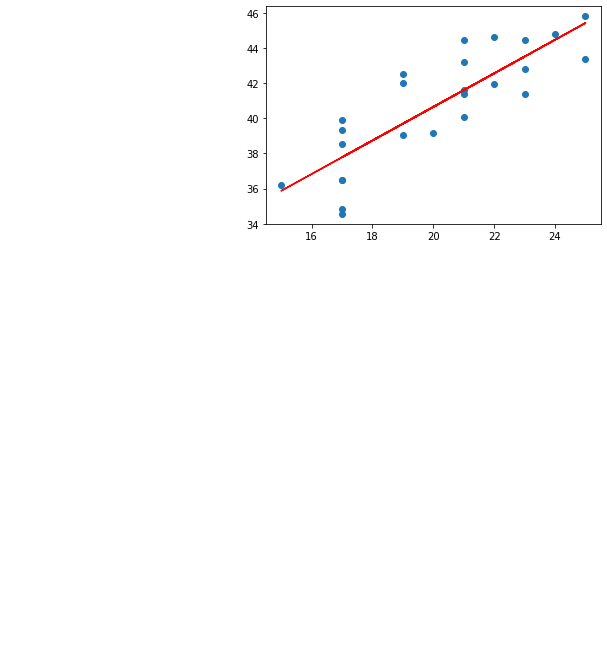

In [20]:
# Calculate the correlation coefficient and linear regression model 
correl=st.pearsonr(x_axis,y_axis)[0]
print(f"Correlation between tumor size and weight is {correl}")

from scipy.stats import linregress
x_axis=data_scatter['weight']
y_axis=data_scatter['tumor_x']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_axis = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_axis,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel('Weight of a mouse')
#plt.ylabel('Tumor Size')
print(f"The r-squared is: {rvalue**2}")
plt.show()
# for mouse weight and average tumor volume for the Capomulin regimen
